In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Load the CSV file
data = pd.read_csv('hospital.csv')

# Inspect the data
print(data.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [2]:
print(data.describe())
corr_matrix = data.corr()
print(corr_matrix)


              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

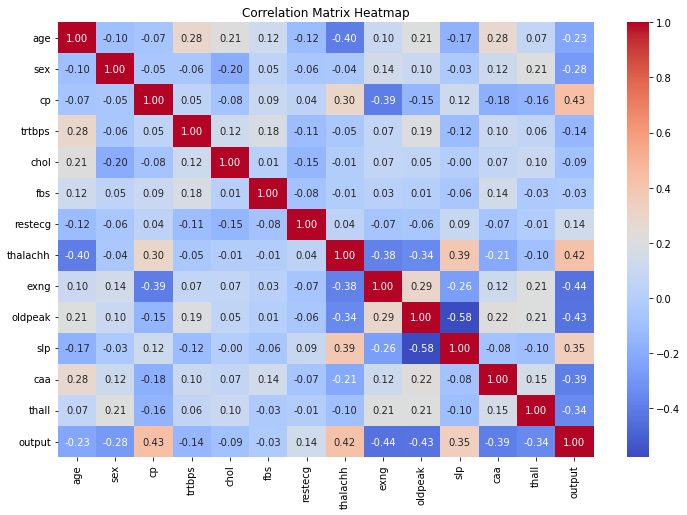

In [3]:
# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


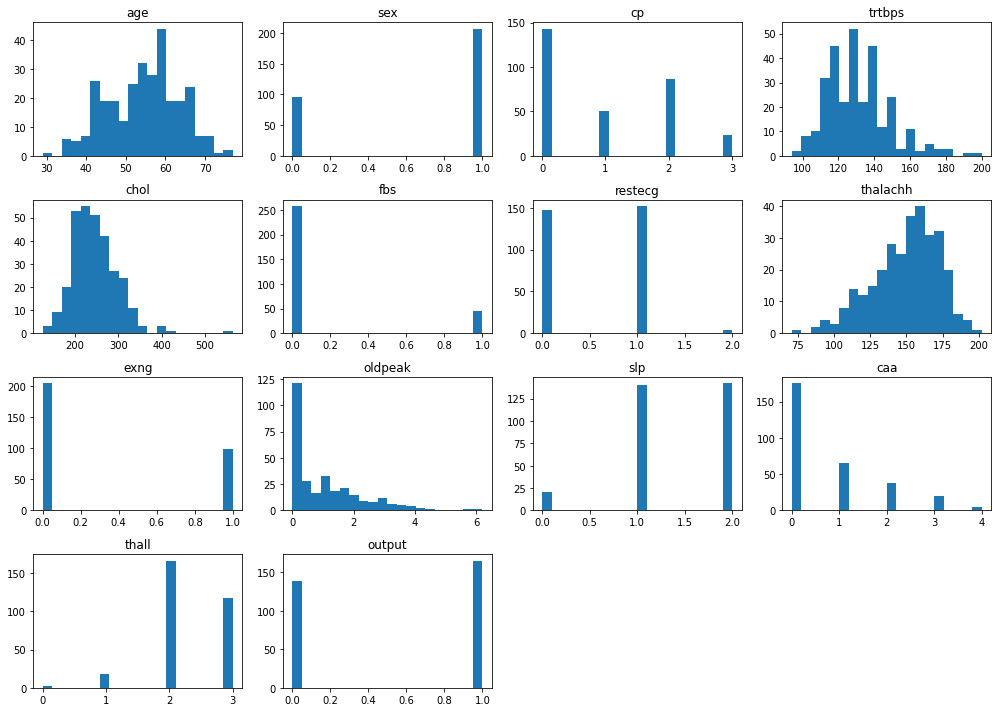

In [4]:
# Histograms for each feature
data.hist(bins=20, figsize=(14, 10), grid=False)
plt.tight_layout()
plt.show()

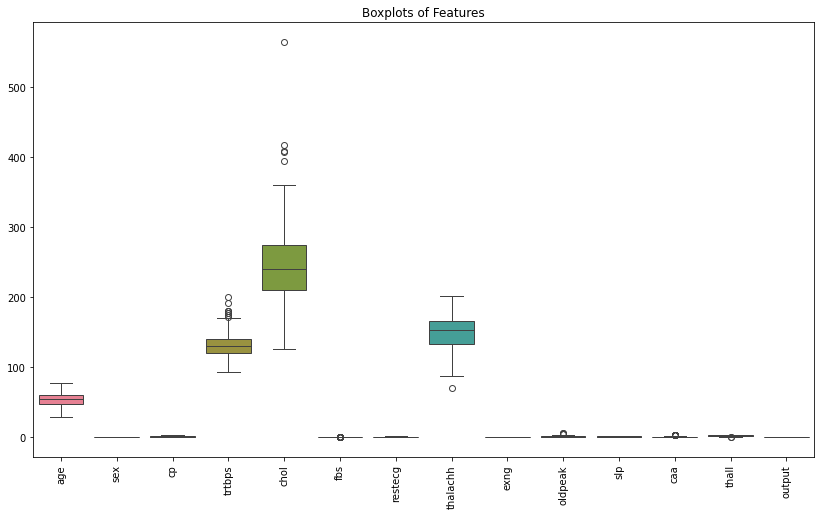

In [5]:
# Boxplots for each feature
plt.figure(figsize=(14, 8))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title('Boxplots of Features')
plt.show()

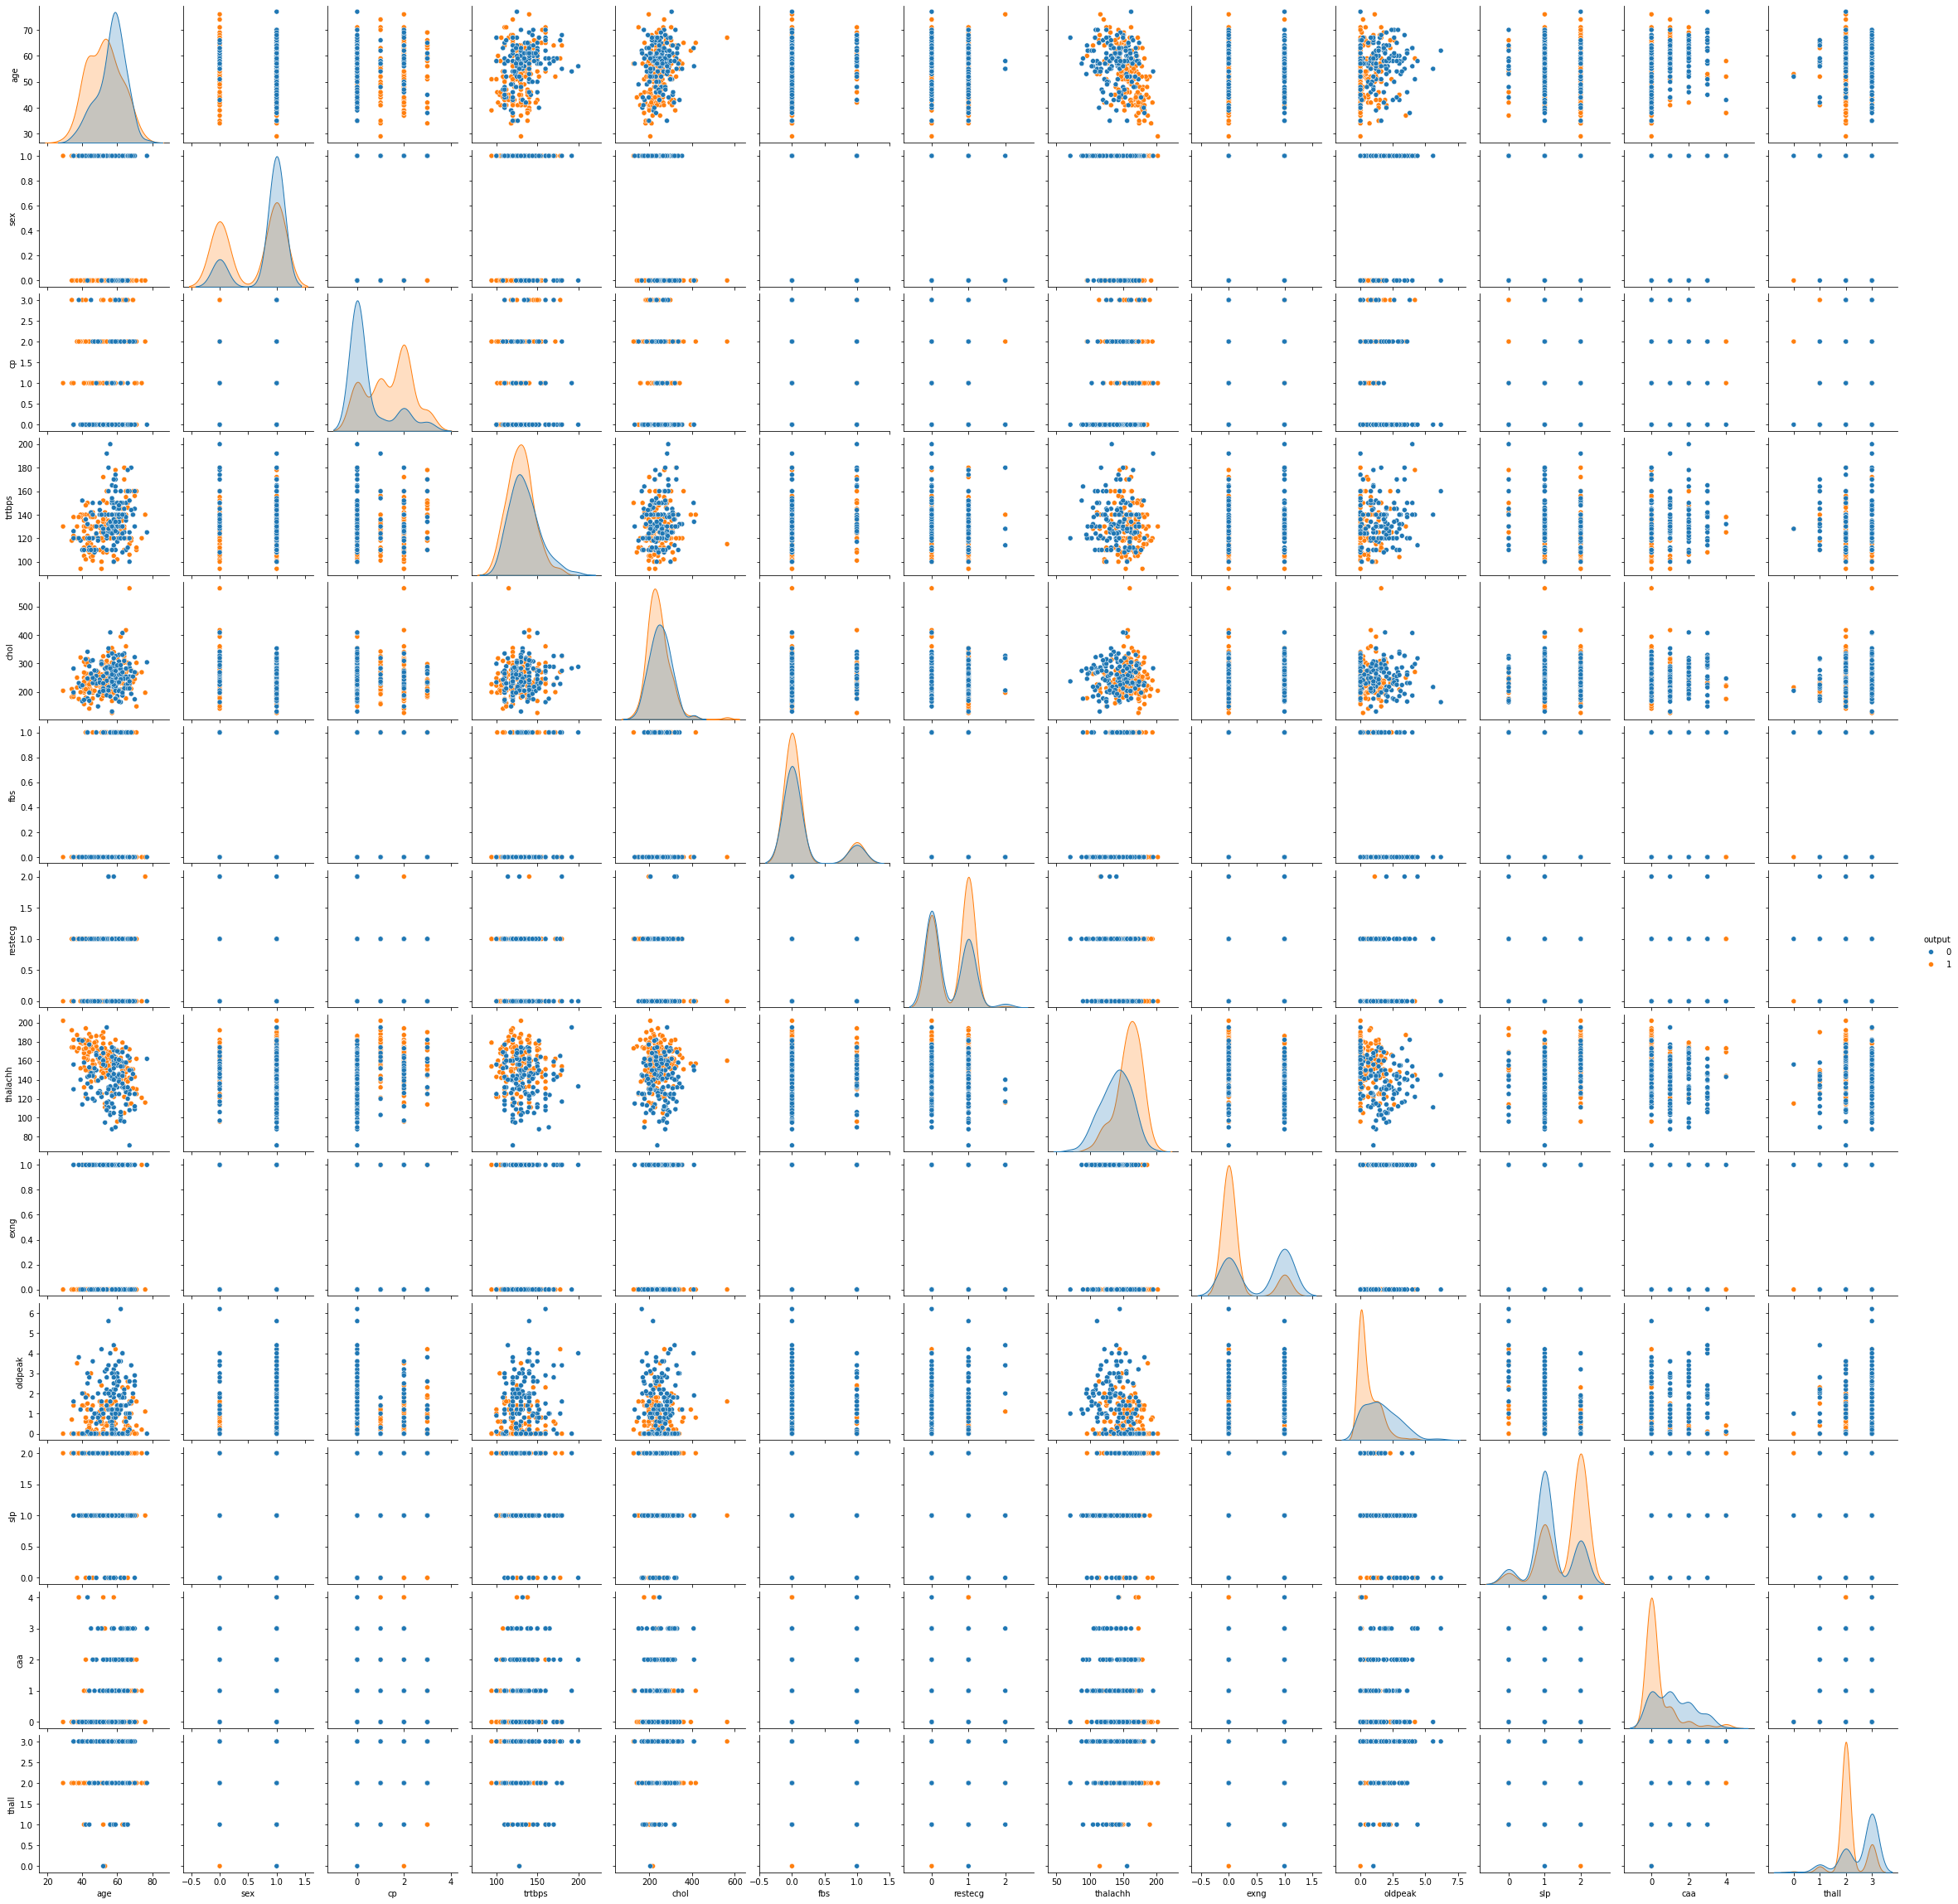

In [6]:
# Pairplot for the dataset
sns.pairplot(data, hue='output', diag_kind='kde')
plt.show()

In [7]:
# Assume 'target' is the column indicating the likelihood of a heart attack
X = data.drop('output', axis=1)
y = data['output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Standardize the data (optional but recommended for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print("-------------------------")
print('Accuracy:', model.score(X_test, y_test))
print("-------------------------")
print(classification_report(y_test, y_pred))
print("-------------------------")
print('ROC AUC Score:', roc_auc_score(y_test, y_prob))


[[25  4]
 [ 5 27]]
-------------------------
Accuracy: 0.8524590163934426
-------------------------
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

-------------------------
ROC AUC Score: 0.9267241379310345


In [15]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=2, scoring='accuracy')

# Print the cross-validation scores and their mean
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the Random Forest model
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print('ROC AUC Score:', roc_auc_score(y_test, y_prob_rf))


Cross-validation scores: [0.86842105 0.79470199]
Mean cross-validation score: 0.8315615196932729
[[24  5]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

ROC AUC Score: 0.9224137931034483


In [2]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# داده‌های آموزشی
X_train = np.array([[1, 2],
                    [3, 4],
                    [5, 6]])

# داده‌های تست
X_test = np.array([[7, 8],
                   [9, 10]])

# ایجاد یک شیء StandardScaler
scaler = StandardScaler()

# استانداردسازی داده‌های آموزشی (fit_transform)
X_train_scaled = scaler.fit_transform(X_train)

# استانداردسازی داده‌های تست (transform)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)
print("-"*10)
print(X_test_scaled)


[[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]
----------
[[2.44948974 2.44948974]
 [3.67423461 3.67423461]]


In [7]:
from sklearn.preprocessing import StandardScaler, Normalizer

# داده‌ها
X = [[1, 2],
     [3, 4],
     [5, 6]]

# استانداردسازی با StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("StandardScaler:\n", X_scaled)

# نرمال‌سازی با Normalizer (L1 norm)
normalizer = Normalizer(norm='l1')  
X_normalized = normalizer.fit_transform(X)
print("\nNormalizer (L1):\n", X_normalized)

# نرمال‌سازی با Normalizer (L2 norm)
normalizer = Normalizer(norm='l2')  
X_normalized = normalizer.fit_transform(X)
print("\nNormalizer (L2):\n", X_normalized)


StandardScaler:
 [[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]

Normalizer (L1):
 [[0.33333333 0.66666667]
 [0.42857143 0.57142857]
 [0.45454545 0.54545455]]

Normalizer (L2):
 [[0.4472136  0.89442719]
 [0.6        0.8       ]
 [0.6401844  0.76822128]]


In [3]:
import altair as alt
import pandas as pd

# Create a DataFrame
data = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [3, 7, 2, 6, 5]
})

# Create a chart
chart = alt.Chart(data).mark_circle().encode(
    x='x',
    y='y',
    tooltip=['x', 'y']
).interactive()  # Make the chart interactive

# Show the chart
chart.show()


alt.Chart(...)